In [1]:
import warnings                                
warnings.filterwarnings('ignore')

import numpy as np                             
import pandas as pd                              
import matplotlib.pyplot as plt                 
import seaborn as sns       
import math as mt

from dateutil.relativedelta import relativedelta 
from scipy.optimize import minimize              

import statsmodels.formula.api as smf           
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    
from tqdm import tqdm_notebook

In [2]:
def load_datas(file):
    df = pd.read_csv(file)
    df.set_index("Date", inplace=True)
    print(df.shape)
    print(df.head())
    return df

In [3]:
tsla_df = load_datas('TSLA.csv')

(1130, 1)
              Close
Date               
1/2/2020  28.684000
1/3/2020  29.534000
1/6/2020  30.102667
1/7/2020  31.270666
1/8/2020  32.809334


In [4]:
appl_df = load_datas('AAPL.csv')

(1130, 1)
              Close
Date               
1/2/2020  72.960464
1/3/2020  72.251137
1/6/2020  72.826866
1/7/2020  72.484360
1/8/2020  73.650360


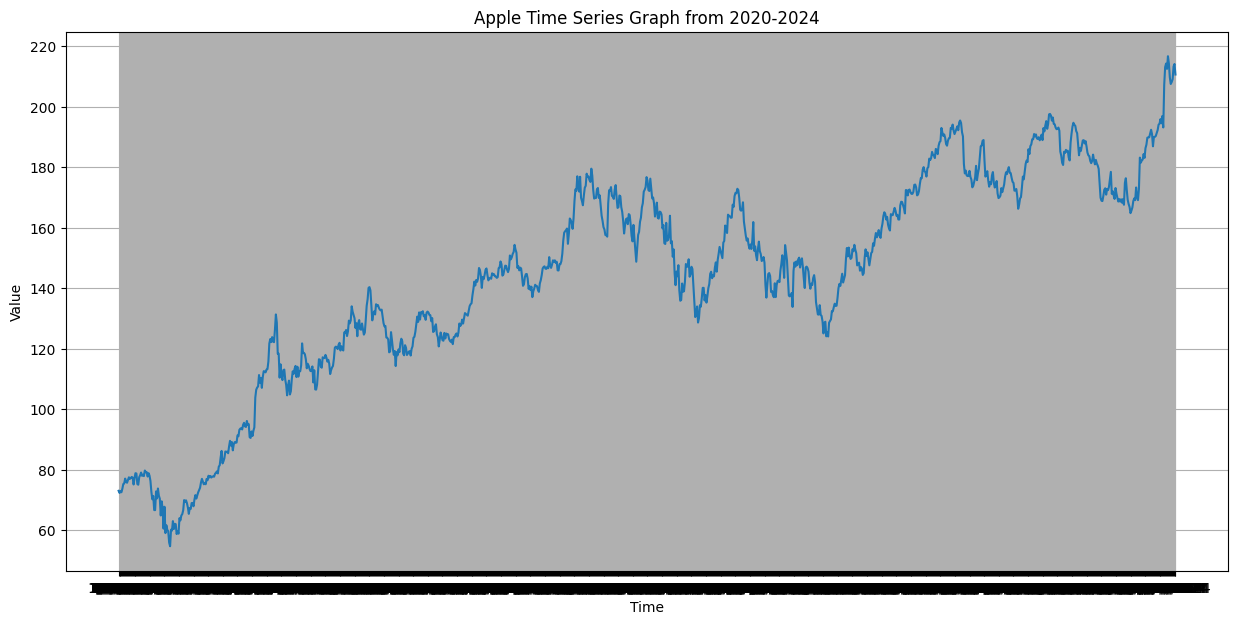

In [5]:
appl_title = 'Apple Time Series Graph from 2020-2024'
tsla_title = 'Tesla Time Series Graph from 2020-2024'

def plot_data(data, title, ylabel='Value', xlabel='Time', figsize=(15, 7)):

    plt.figure(figsize=figsize)
    plt.plot(data)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid(True)
    
    plt.show()

plot_data(appl_df['Close'], title = appl_title)

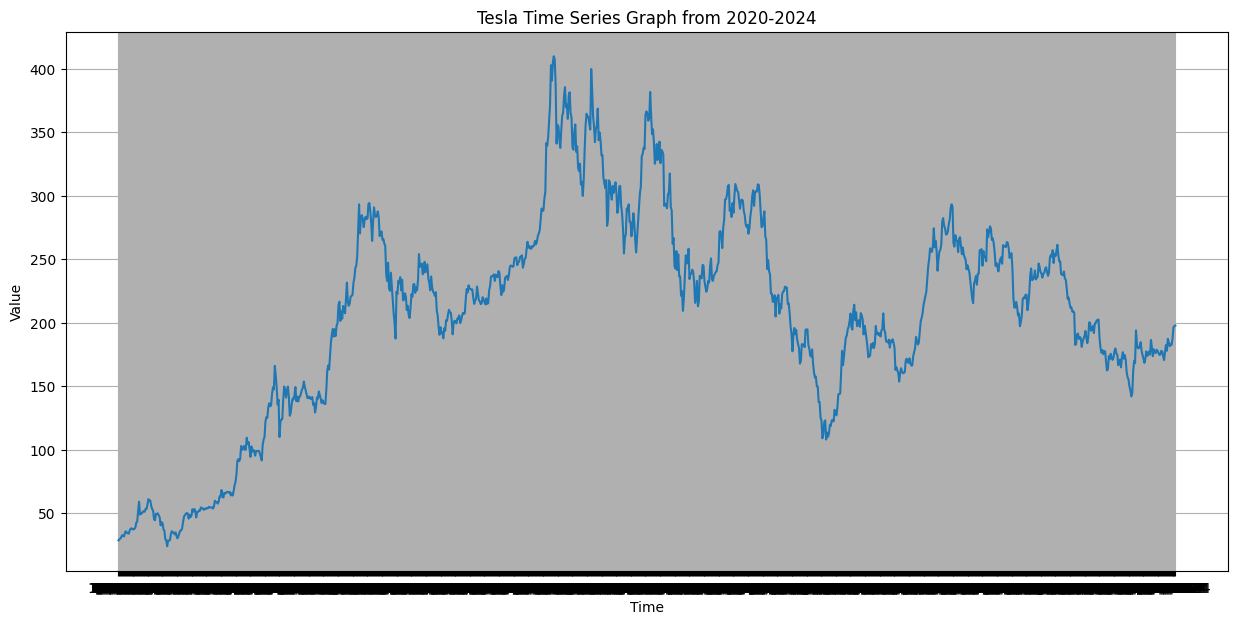

In [6]:
plot_data(tsla_df['Close'], title = tsla_title)

R-squared (R²)

$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}i)^2}{\sum{i=1}^{n} (y_i - \bar{y})^2} $

R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An $ R^2 $ of 1 indicates that the regression predictions perfectly fit the data.

Mean Absolute Error (MAE)

$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $

Mean Absolute Error is the average of the absolute differences between actual and predicted values. It gives an idea of how wrong the predictions were in terms of the units of the variable of interest.

Median Absolute Error (MedAE)

$ \text{MedAE} = \text{median}(|y_i - \hat{y}_i|) $

Median Absolute Error is the median of the absolute differences between actual and predicted values. It is more robust to outliers compared to the mean absolute error.

Mean Squared Error (MSE)

$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

Mean Squared Error is the average of the squares of the differences between actual and predicted values. It gives more weight to larger errors due to the squaring of each term.

Mean Squared Logarithmic Error (MSLE)

$ \text{MSLE} = \frac{1}{n} \sum_{i=1}^{n} (\log(1 + y_i) - \log(1 + \hat{y}_i))^2 $

Mean Squared Logarithmic Error is similar to Mean Squared Error but works with the logarithm of the predicted and actual values. It is useful when the targets are exponentially growing.

Mean Absolute Percentage Error (MAPE)

$ \text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100 $

Mean Absolute Percentage Error expresses the error as a percentage of the actual data, making it easier to interpret in the context of the original data values.

In [7]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Move: Differencing

Differencing the data to make it stationary:

$ y't = y_t - y{t-1} $

Smooth: Moving Average

Applying a moving average to the differenced data:

$ MA_t = \frac{1}{n} \sum_{i=0}^{n-1} y_{t-i}' $

Evaluate: Mean Squared Error (MSE)

Evaluating the model using the Mean Squared Error:

$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

In [8]:
def moving_average(df , n):
    return np.average(df[-n:])

moving_average(tsla_df, 7)

189.45428685714288

In [9]:
moving_average(appl_df, 7)

210.33571500000002

Confidence Interval Formula - Upper Limit and Lower Limit

$$
\bar{x} \pm z^* \left(\frac{\sigma}{\sqrt{n}}\right)
$$


In [10]:
def plotMovingAverage(df, window, plot_interval=False, scale=1.96, plot_anomalies=False):
    rolling_mean = df.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    if plot_interval:
        mae =  mean_absolute_error(df[window:], rolling_mean[window:])
        deviation = np.std(df[window:]- rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        print("MAE", mae, "deviation", deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        if plot_anomalies:
            anomalies = pd.DataFrame(index=df.index, columns=df.columns)
            anomalies[df<lower_bond] = df[df<lower_bond]
            anomalies[df>upper_bond] = df[df>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(df[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

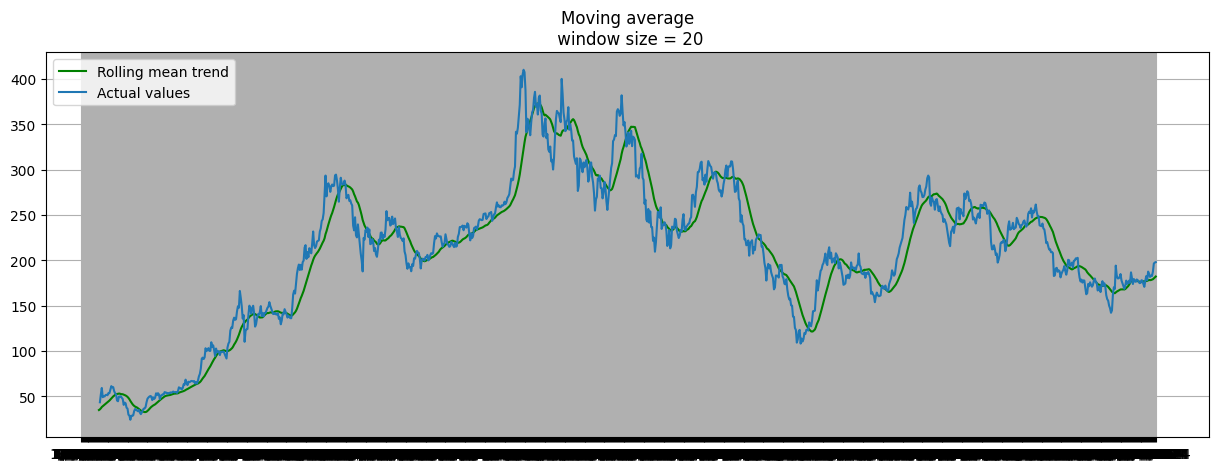

In [11]:
plotMovingAverage(tsla_df, 20) 

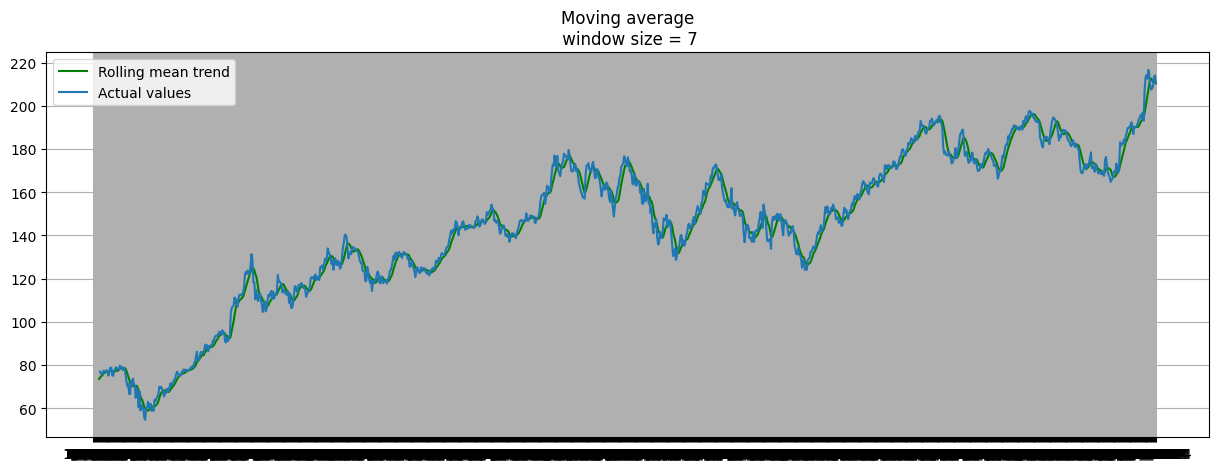

In [12]:
plotMovingAverage(appl_df, 7)

MAE 8.242244436585677 deviation Close    11.236379
dtype: float64


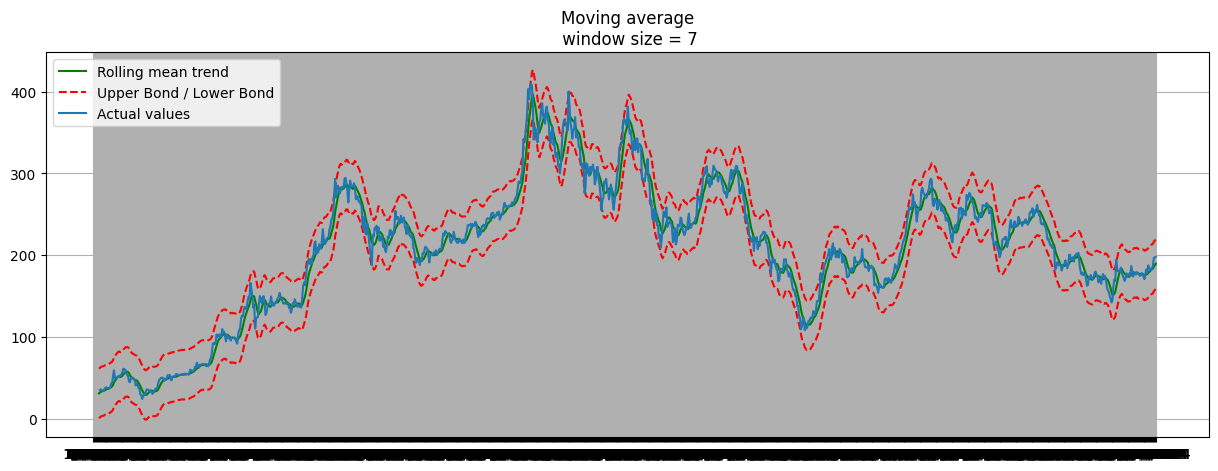

In [13]:
plotMovingAverage(tsla_df, 7, plot_interval=True)

MAE 2.7080671828011713 deviation Close    3.466182
dtype: float64


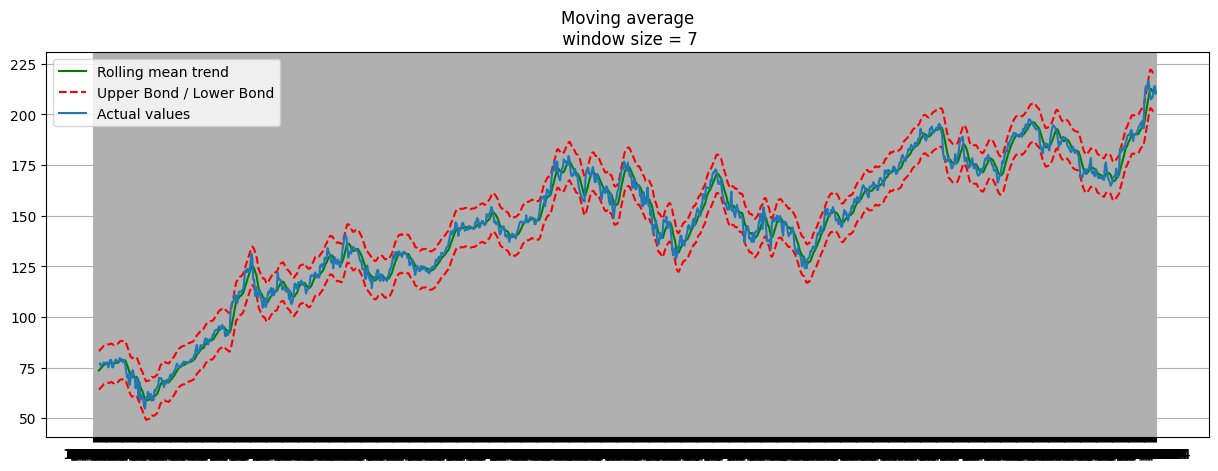

In [14]:
plotMovingAverage(appl_df, 7, plot_interval=True)

MAE 8.242244436585677 deviation Close    11.236379
dtype: float64


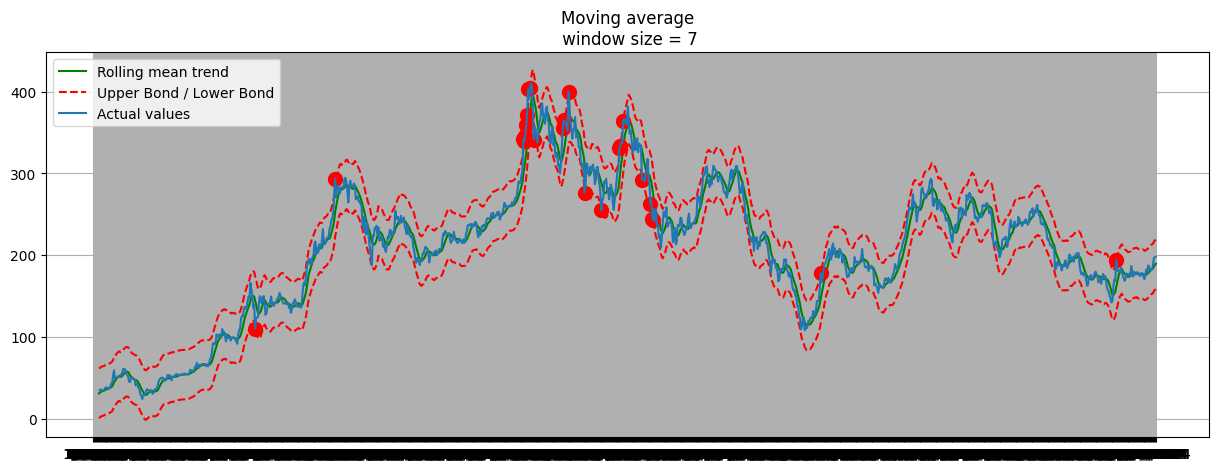

In [15]:
plotMovingAverage(tsla_df, 7, plot_interval=True, plot_anomalies=True)

MAE 2.7080671828011713 deviation Close    3.466182
dtype: float64


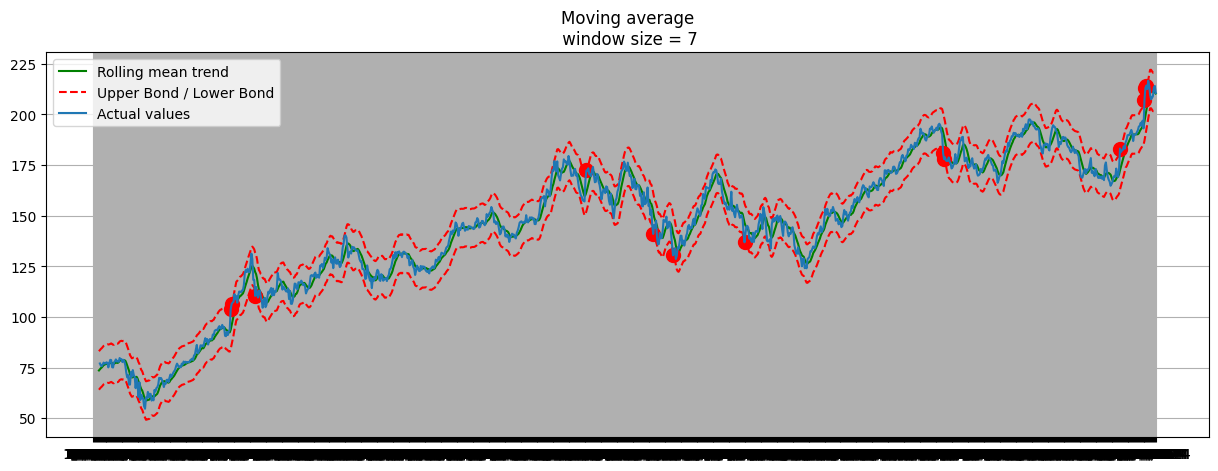

In [16]:
plotMovingAverage(appl_df, 7, plot_interval=True, plot_anomalies=True)

In [17]:
import statsmodels.formula.api as smf

tsla_df1 = tsla_df.copy()

tsla_df1['Yr1'] = tsla_df['Close'].shift(1)
tsla_df1['Yr2'] = tsla_df['Close'].shift(2)
tsla_df1['Yr3'] = tsla_df['Close'].shift(3)

tsla_df1 = tsla_df1.dropna()

model = smf.ols(formula="Close ~ Yr1 + Yr2 + Yr3", data=tsla_df1)
tsla_df_model = model.fit()

print(tsla_df_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.549e+04
Date:                Thu, 08 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:44:02   Log-Likelihood:                -3982.5
No. Observations:                1127   AIC:                             7973.
Df Residuals:                    1123   BIC:                             7993.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6537      0.676      2.445      0.0

Exponential Soothing Average

$
\hat{y}_t = \alpha \cdot y_t + (1 - \alpha) \cdot \hat{y}_{t-1}
$

$
\hat{y}_t \text{ is the smoothed value at time } t.
$

$
y_t \text{ is the actual value at time } t.
$

$
\hat{y}_{t-1} \text{ is the smoothed value at time } t-1.
$

$
\alpha \text{ (where } 0 < \alpha < 1) \text{ is the smoothing factor or smoothing constant.}
$


In [18]:
def exponential_smoothing(df, alpha):
    result = [df.iloc[0]]
    for n in range(1, len(df)):
        result.append(alpha * df.iloc[n] + (1 - alpha) * result[n - 1])
    return result

In [19]:
def plotExponentialSmoothing(df, alphas):
    plt.figure(figsize=(15, 7))
    
    for alpha in alphas:
        smoothed_series = exponential_smoothing(df, alpha)
        plt.plot(smoothed_series, label=f"Alpha {alpha}")
    
    plt.plot(df.values, "c", label="Actual")
    plt.legend(loc="best")
    plt.title("Exponential Smoothing")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

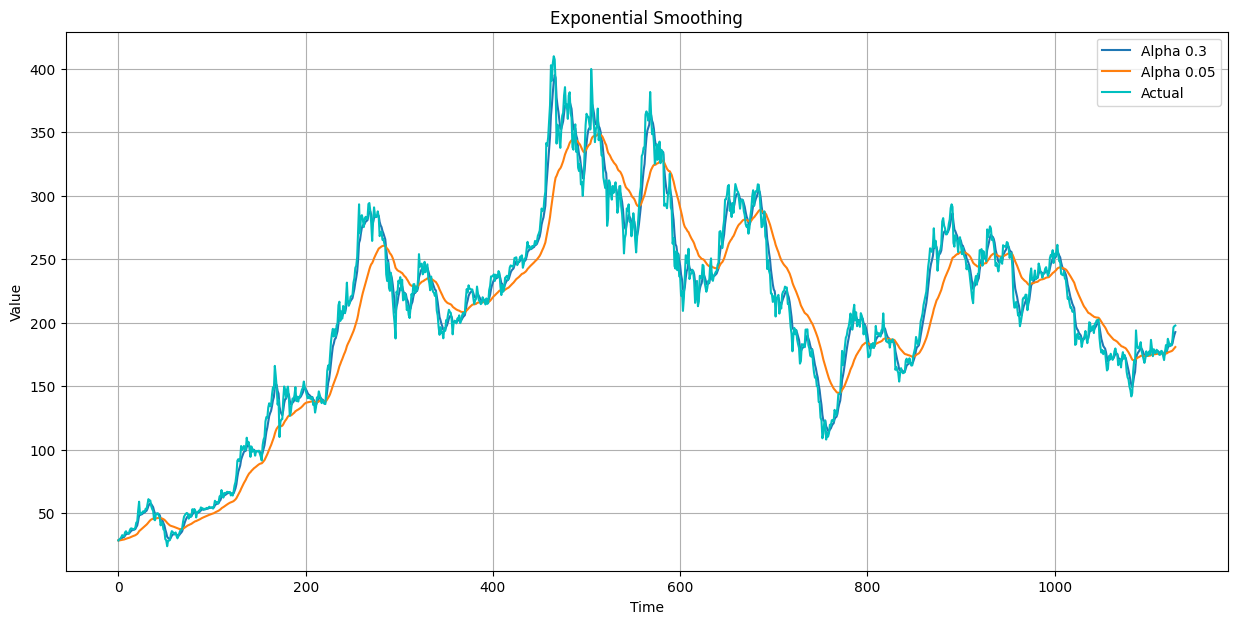

In [20]:
plotExponentialSmoothing(tsla_df, [0.3,0.05])

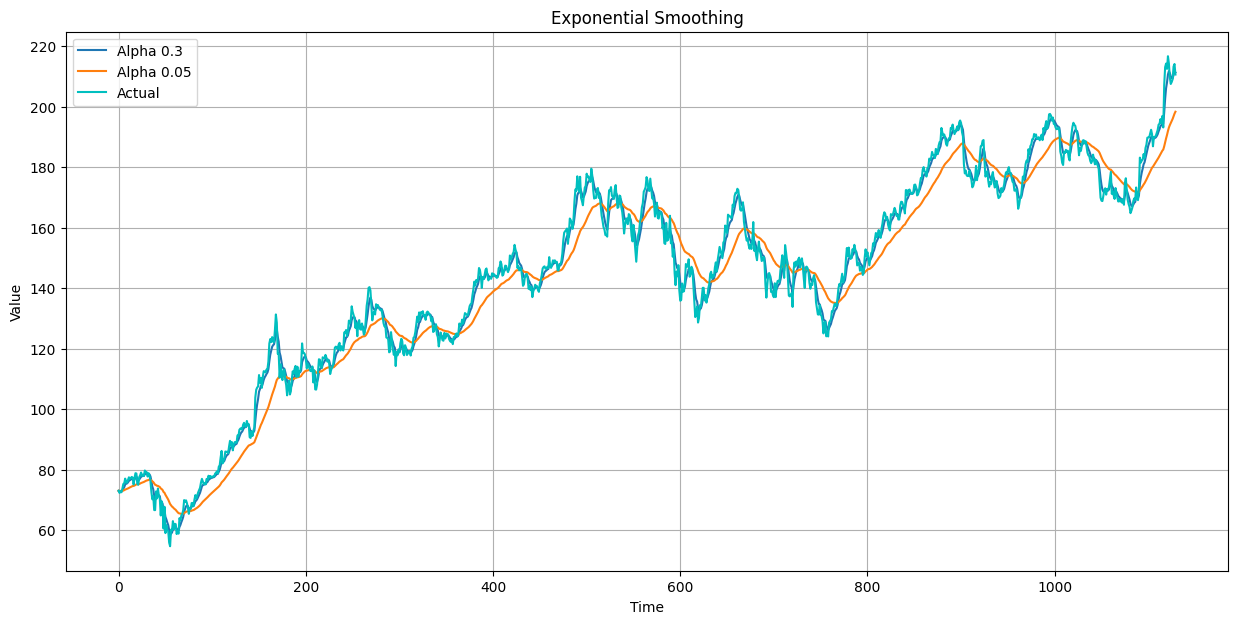

In [21]:
plotExponentialSmoothing(appl_df, [0.3,0.05])